# Entanglement swap

Questo circuito permette di scambiare l'entanglement tra due coppie di qubit $q_0q_1$ (di Alice) e $q_2q_3$ (di Bob), mettendo in entanglement $q_0q_3$ e $q_1q_2$. È utile per la **quantum communication**, in quanto permette di mettere in entanglement qubit che non si sono mai incontrati.

In [1]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram

from BoredQiskit import FastQiskit as fq

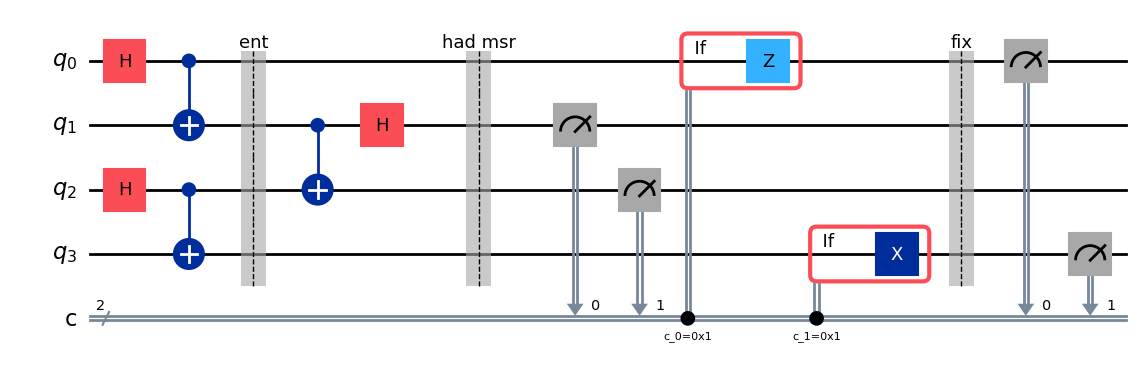

In [2]:
qc = QuantumCircuit(4,2)
qc.h(0)
qc.cx(0,1)
qc.h(2)
qc.cx(2,3)
qc.barrier(label="ent")

qc.cx(1,2)
qc.h(1)
qc.barrier(label="had msr")

qc.measure(range(1,3), range(2))

with qc.if_test((qc.clbits[0], 1)):
    qc.z(0)
with qc.if_test((qc.clbits[1], 1)):
    qc.x(3)

qc.barrier(label="fix")
qc.measure(0,0)
qc.measure(3,1)
qc.draw('mpl')

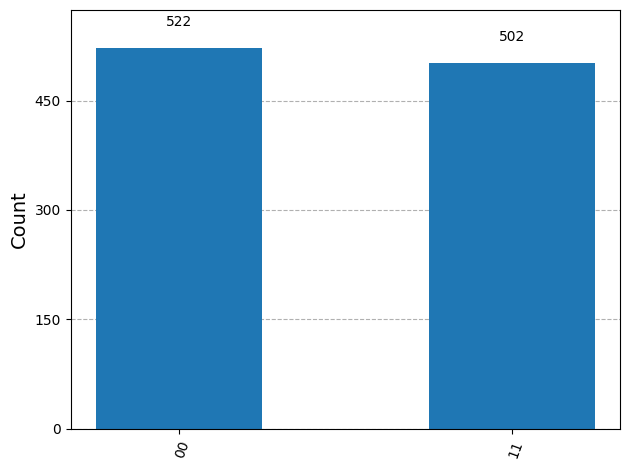

In [3]:
counts = fq.run(qc)
plot_histogram(counts)

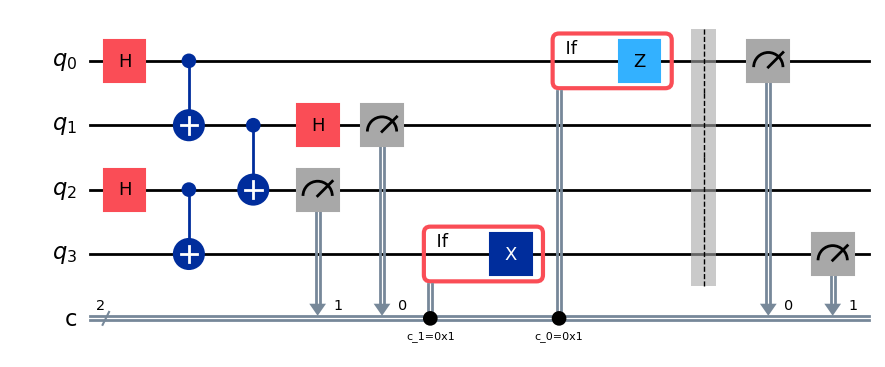

In [26]:
def swap_propagation(n: int):
    N = 2**n
    qc = QuantumCircuit(N,2)
    for i in range(0, N, 2):
        qc.h(i)
        qc.cx(i,i+1)

    for i in range(1, N-2, 2):
        qc.cx(i,i+1)
        qc.h(i)
        qc.measure(range(i,i+2), range(2))
        with qc.if_test((qc.clbits[0], 1)):
            qc.z(i-1)
        with qc.if_test((qc.clbits[1], 1)):
            qc.x(i+2)
    qc.barrier()
    qc.measure(0,0)
    qc.measure(N-1,1)

    return qc

swap_propagation(2).draw('mpl')